# hypothesis 3: women use religious speech less than men

# load data and imports

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import os

tqdm.pandas()

In [85]:
DATA_PATH = "/data/laviniad/congress_errata/congress_df.json"
df = pd.read_json(DATA_PATH)
df['date'] = pd.to_datetime(df['date'].apply(str), format='%Y%m%d')
df['month'] = df['date'].dt.month

In [86]:
set(df['year'])

{1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023}

In [ ]:
raw_df = df.copy()

# filter

In [88]:
def is_dem_rep(t):
    return (t == 'Democrat') or (t == 'Republican')

def not_procedural_unknown_topic(x):
    return (not ('Procedural' in x)) and (not ('Unknown' in x))

def is_long(x, thresh=5): # takes string, whitespace heuristic
    return len(x.split()) > thresh

def is_in_range(x):
    return x in range(1995, 2023)

df = df[df['party'].progress_apply(is_dem_rep)]
#df = df[df['main_topic'].progress_apply(not_procedural_unknown_topic)]
df = df[df['year'].progress_apply(is_in_range)]
df = df[df['text'].progress_apply(is_long)]

  0%|          | 0/1328805 [00:00<?, ?it/s]

  0%|          | 0/1203575 [00:00<?, ?it/s]

  0%|          | 0/1182286 [00:00<?, ?it/s]

In [91]:
print(f"Filtered out {len(raw_df) - len(df)} rows")
print(f"New length: {len(df)}")

Filtered out 0 rows
New length: 1328805


In [93]:
df_118 = raw_df[raw_df['congress_num'] == 118]

In [99]:
from data.congress_utils import induce_gender

df = induce_gender(df)
df['general'] = df['num_general'] > 0
df['christian'] = df['num_christian'] > 0

In [100]:
palette = {'Democrat': 'blue', 'Republican': 'red', 'New Progressive': 'grey', 'Popular Democrat': 'grey', 'Independence Party (Minnesota)': 'grey', 'Anti-Jacksonian': 'grey', 'Independent': 'green', 'unknown': 'black', 'Democrat Farmer Labor': 'blue'}
sns.set(context="notebook", font_scale=3, rc={'figure.figsize':(18,14), 'font.weight': 'normal'}, style='whitegrid')

# keyword analyses

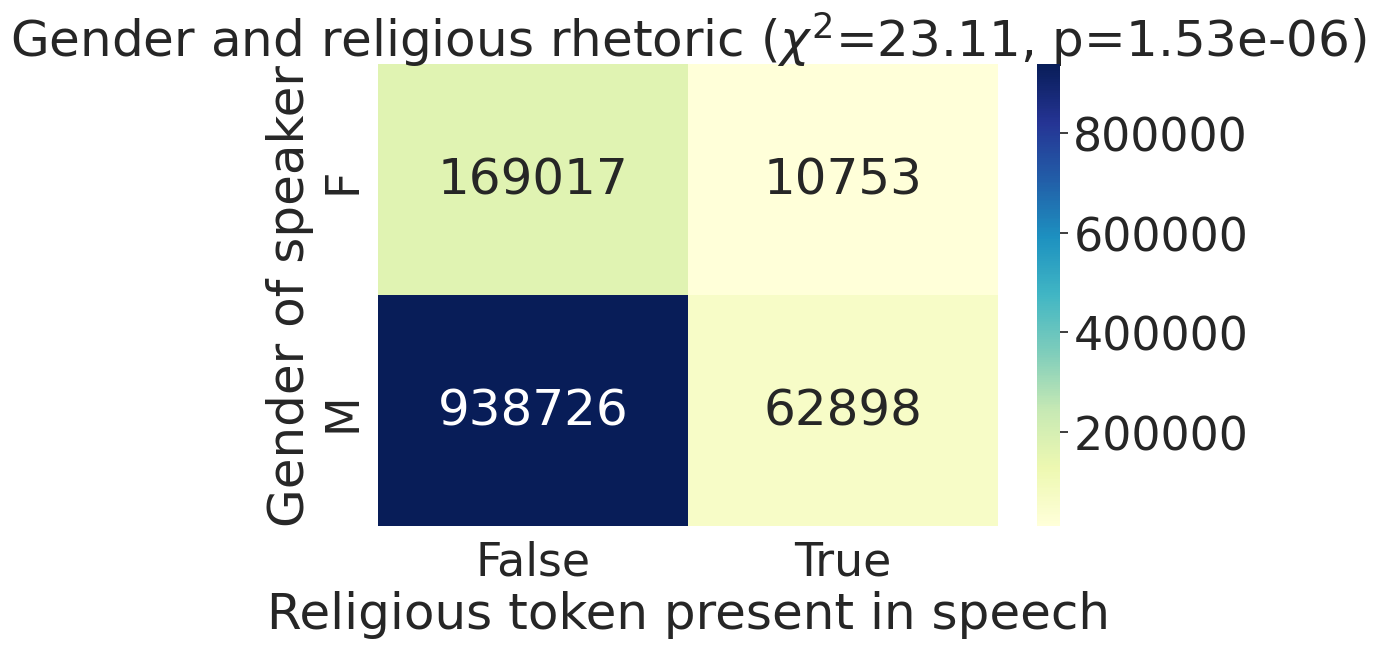

In [101]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['gender'], df['binary_lex'])
contingency = contingency.astype(int)
c, p, dof, expected = chi2_contingency(contingency)

plt.figure(figsize=(10, 6))
sns.heatmap(contingency, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Gender and religious rhetoric ($\u03C7^2$=%.2f, p=%.2e)" % (c, p))
plt.xlabel("Religious token present in speech")
plt.ylabel("Gender of speaker")
plt.show()

In [102]:
print(f"Men's percentage of speeches: {100 * contingency[True]['M'] / (contingency[True]['M'] + contingency[False]['M'])}")
print(f"Women's percentage of speeches: {100 * contingency[True]['F'] / (contingency[True]['F'] + contingency[False]['F'])}")

Men's percentage of speeches: 6.27960192647141
Women's percentage of speeches: 5.981531957501252


In [ ]:
df.columns

Index(['bio_id', 'congress_num', 'year', 'date', 'chamber', 'speaker', 'text',
       'month_code', 'month', 'gender', 'party', 'state', 'is_in_senate',
       'enclosing_county', 'perc_adherents', 'religion', 'is_republican',
       'church_in_bio', 'dw_nom_1', 'dw_nom_2', 'lexical', 'num_general',
       'num_christian', 'length', 'binary_lex', 'full_state',
       'state_perc_white', 'state_perc_black', 'general', 'christian',
       'party_adj', 'category'],
      dtype='object')

/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

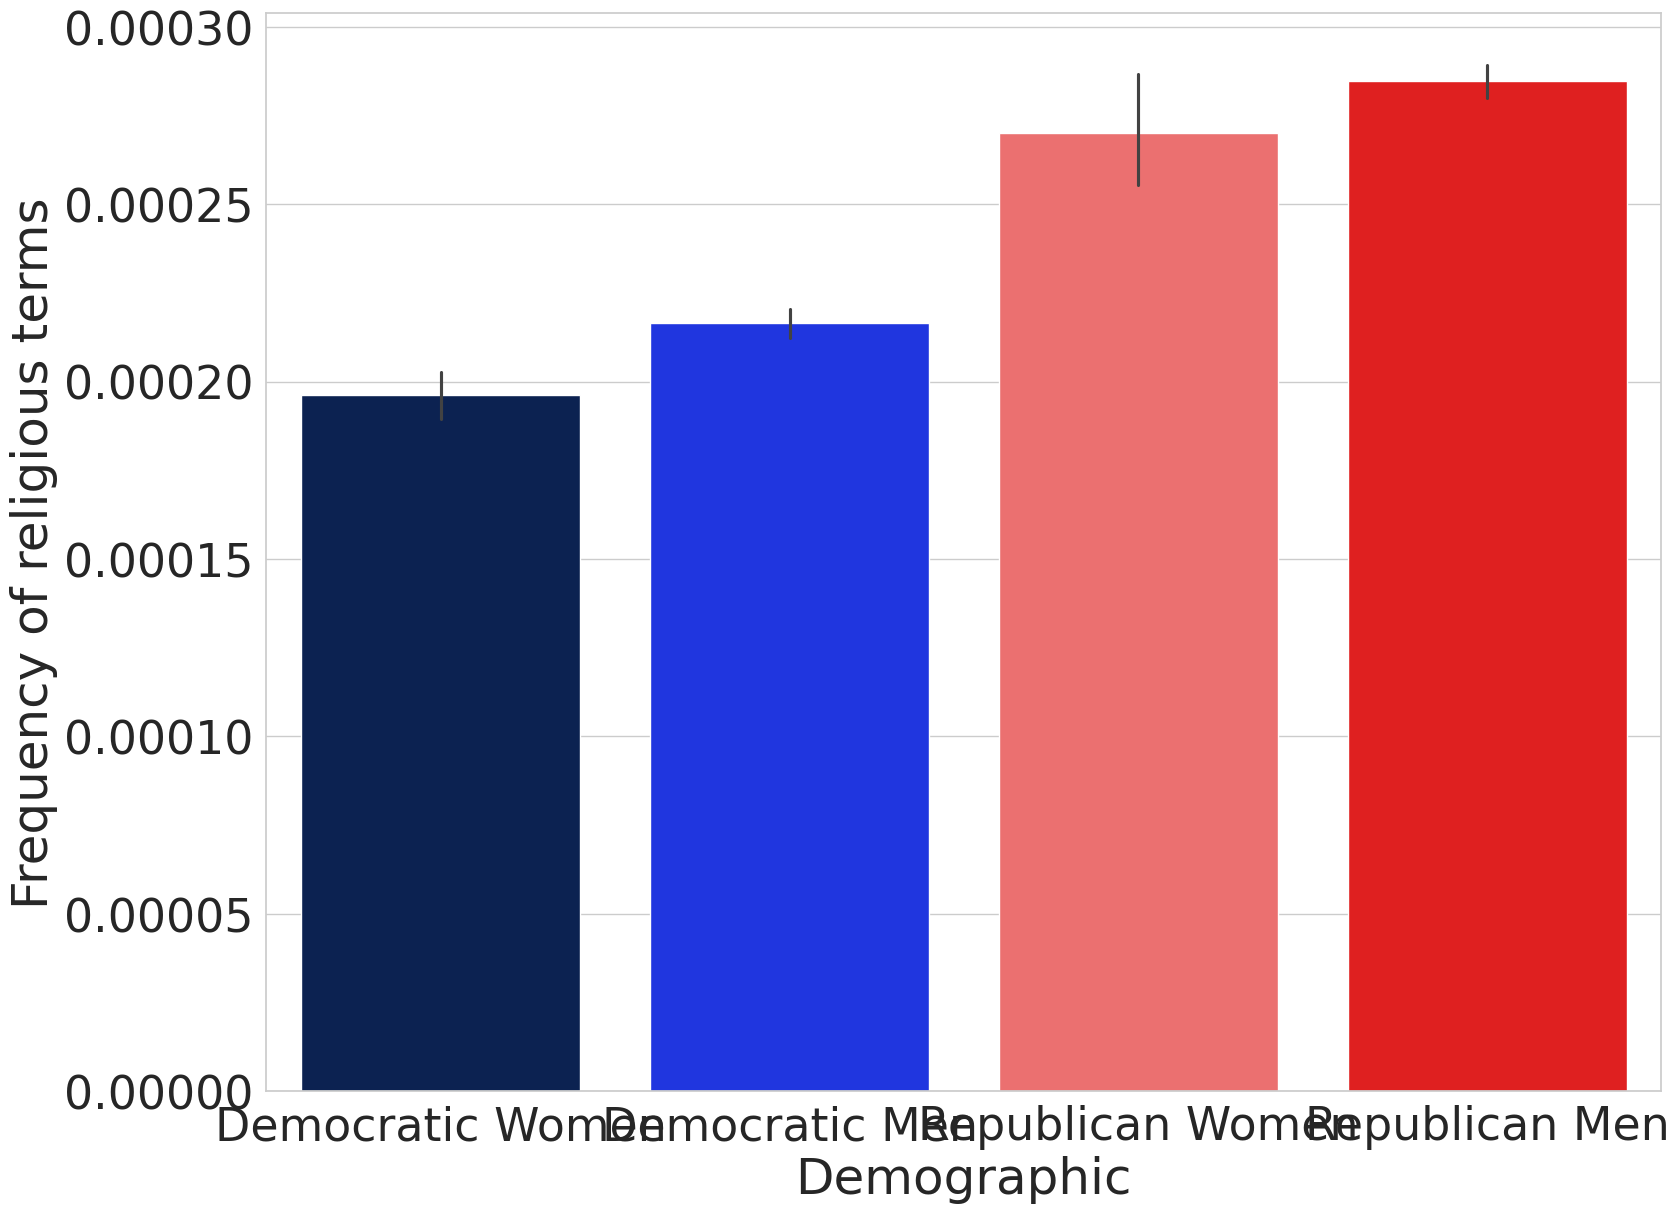

In [103]:
full_gender = {'M': 'Men', 'F': 'Women'}
palette = {'Democratic Men': '#001eff', 'Democratic Women': '#001e5c', 'Republican Men': '#ff0000', 'Republican Women': '#ff5c5c'}

order = ['Democratic Women', 'Democratic Men', 'Republican Women', 'Republican Men']

df['party_adj'] = df['party'].apply(lambda x: 'Democratic' if x == 'Democrat' else x)
df['category'] = df['party_adj'] + ' ' + df['gender'].apply(lambda x: full_gender[x])

sns.barplot(data=df, x='category', y='lexical', hue='category', palette=palette, order=order)

plt.xlabel("Demographic")
plt.ylabel("Frequency of religious terms")

plt.savefig("/home/laviniad/projects/religion_in_congress/notebooks/plots/gender_kw_rate.pdf", format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [104]:
# in df, print mean and sd of lexical for each category

df.groupby('category')['lexical'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Democratic Men,480229.0,0.000216,0.001419,0.0,0.0,0.0,0.0,0.111111
Democratic Women,136897.0,0.000196,0.001271,0.0,0.0,0.0,0.0,0.117647
Republican Men,521395.0,0.000285,0.001739,0.0,0.0,0.0,0.0,0.111111
Republican Women,42873.0,0.000270,0.001741,0.0,0.0,0.0,0.0,0.058824


/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

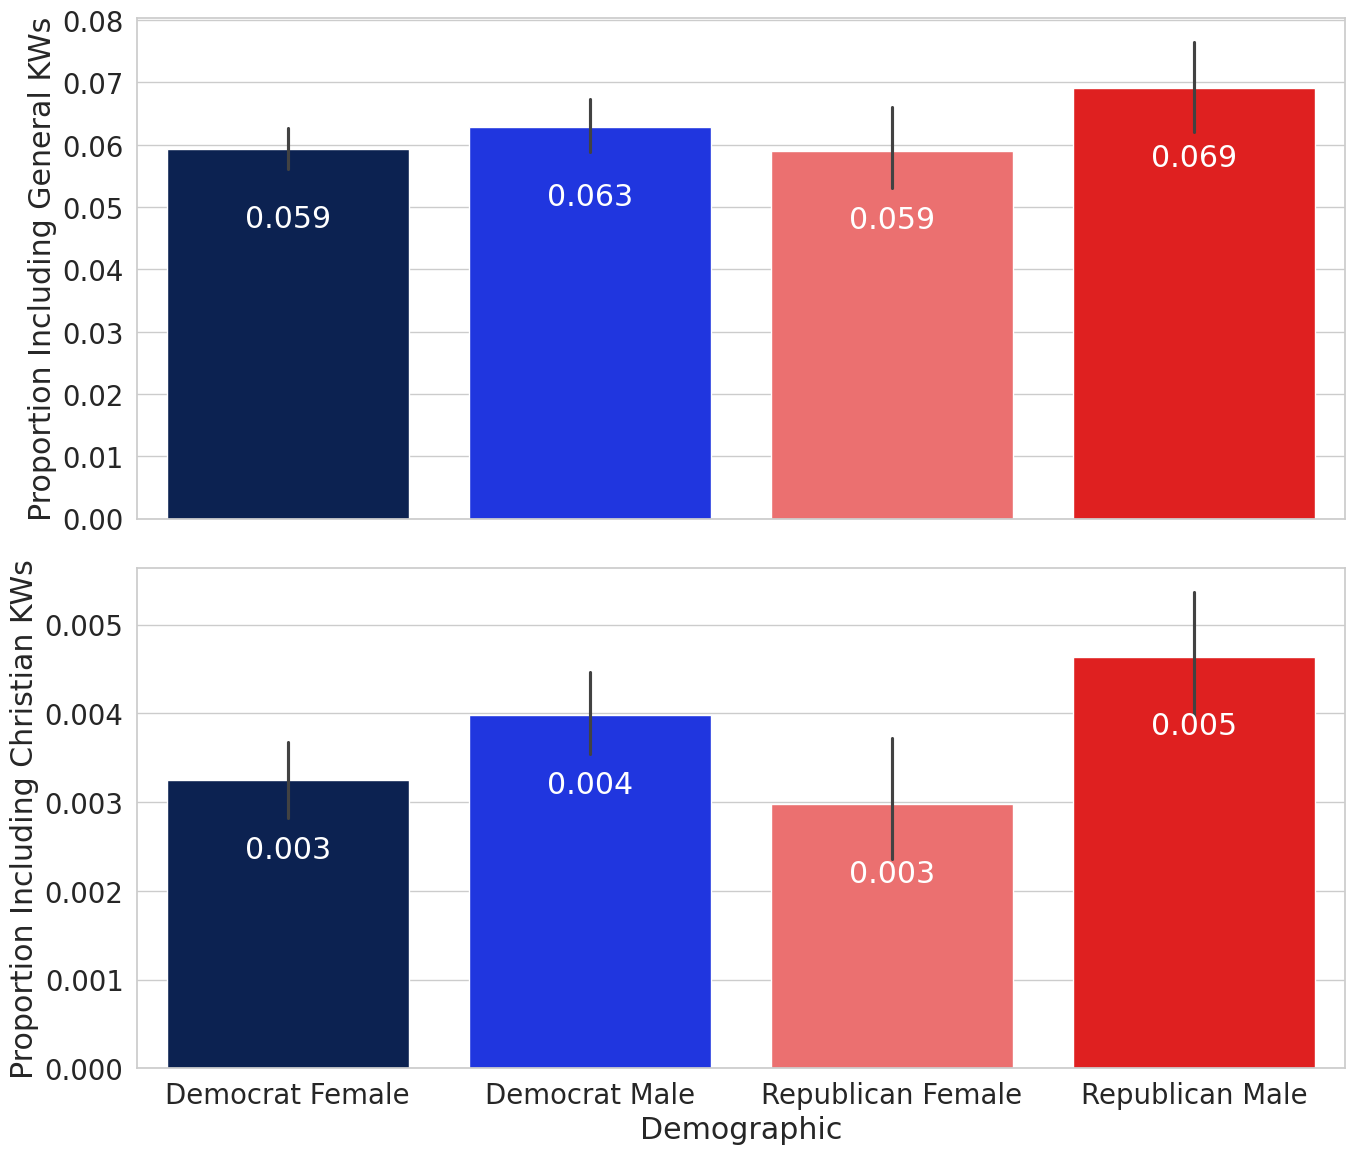

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.8)

full_gender = {'M': 'Male', 'F': 'Female'}
palette = {'Democrat Male': '#001eff', 'Democrat Female': '#001e5c', 'Republican Male': '#ff0000', 'Republican Female': '#ff5c5c'}

df['category'] = df['party'] + ' ' + df['gender'].apply(lambda x: full_gender[x])
results = df.groupby(['year', 'category']).agg({'general': 'mean', 'christian': 'mean'}).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

sns.barplot(data=results, x='category', y='general', hue='category', palette=palette, ax=ax1)
ax1.set_xlabel('Demographic')
ax1.set_ylabel('Proportion Including General KWs')

# Annotate bars with means
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -50), textcoords='offset points', color='white')

sns.barplot(data=results, x='category', y='christian', hue='category', palette=palette, ax=ax2)
ax2.set_xlabel('Demographic')
ax2.set_ylabel('Proportion Including Christian KWs')

# Annotate bars with means
for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -50), textcoords='offset points', color='white')

plt.tight_layout()
plt.show()

In [52]:
speech_counts = df['category'].value_counts()
print(speech_counts)


category
Republican Men      521395
Democratic Men      480229
Democratic Women    136897
Republican Women     42873
Name: count, dtype: int64


In [53]:
# for each category, print average LR score
for c in ['Democrat Male', 'Democrat Female', 'Republican Male', 'Republican Female']:
    vals = df[df['category'] == c]['avg_lr_prob']
    mean, sd = np.mean(vals), np.std(vals)
    print(f"For identity {c}, mean average LR score is {mean} +- {sd}")

KeyError: 'avg_lr_prob'

In [ ]:
# for each category, print average LR score
for c in ['Democrat Male', 'Democrat Female', 'Republican Male', 'Republican Female']:
    vals = df[df['category'] == c]['lr_label_prop_religious']
    mean, sd = np.mean(vals), np.std(vals)
    print(f"For identity {c}, mean average LR score is {mean} +- {sd}")

For identity Democrat Male, mean average LR score is 0.1151924957169692 +- 0.16857825164590678
For identity Democrat Female, mean average LR score is 0.11272262690838623 +- 0.1589540654635148
For identity Republican Male, mean average LR score is 0.1148015579501369 +- 0.17560799193507556
For identity Republican Female, mean average LR score is 0.1067455590357436 +- 0.15841133514548505


/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

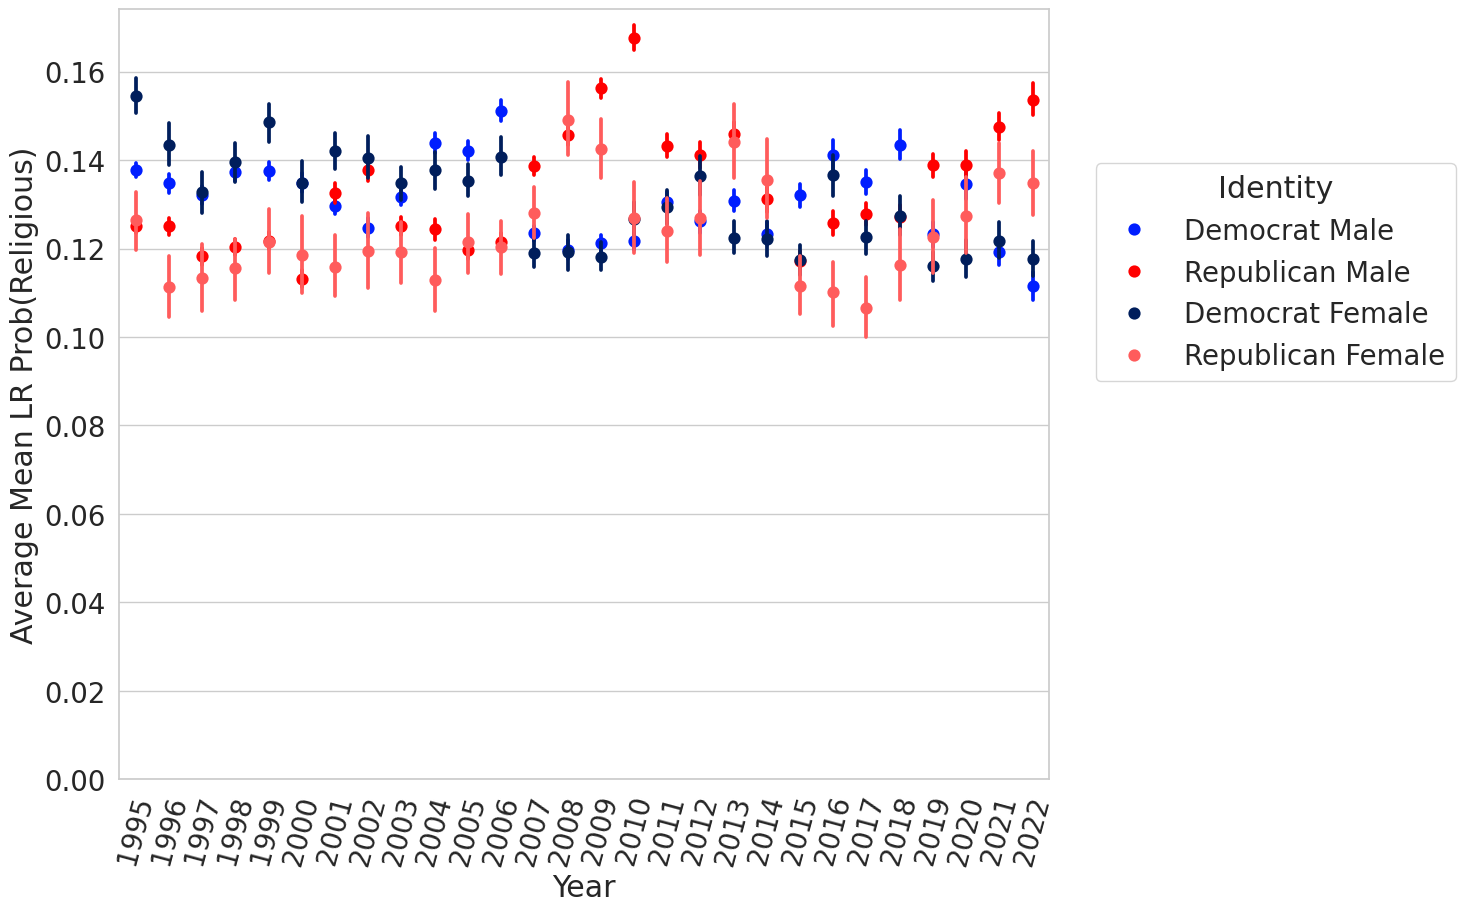

In [ ]:
palette = {'Democrat Male': '#001eff', 'Democrat Female': '#001e5c', 'Republican Male': '#ff0000', 'Republican Female': '#ff5c5c'}

sns.pointplot(data=df, y='avg_lr_prob', x='year', hue='category', palette=palette, linestyle='none')
#sns.lineplot(data=res, y='lexical', x='year', color='black', ci=None)
#sns.pointplot(y=pres_num[:,3], x=pres_num[:,0], hue=pres_num[:,4])#, linestyle='none', errorbar=None)
plt.ylim(0, None)
plt.xticks(rotation=75)
plt.ylabel('Average Mean LR Prob(Religious)')
plt.xlabel('Year')
plt.legend(title='Identity', bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
plt.show()

# BR analyses

In [ ]:
import pickle as pkl
import re
from data.bible_utils import comp_bible_helper
import nltk

MPNET_RESULTS = '/data/laviniad/sermons-ir/modeling/mpnet_results'
with open(MPNET_RESULTS + "/data.pkl", "rb") as f:
    data = pkl.load(f)

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

bible_df = comp_bible_helper()
pop_verses = pd.read_csv('/home/laviniad/projects/religion_in_congress/data/most_popular_verses.csv')
n = 500 # VERY generous
pop_citations = list(pop_verses['verse'].iloc[1:n+1])
bible_df['King James Bible'] = bible_df['King James Bible'].apply(remove_tags) # KJV in this df has italics etc
bible_df['Verse'] = bible_df['Verse'].apply(lambda x: x.lower())
limited_bible_df = bible_df[bible_df['Verse'].apply(lambda x: x in pop_citations)]
limited_verses = limited_bible_df['King James Bible']
verse_df = [{'text': t['King James Bible'], 'citation': t['citation']} for idx,t in limited_bible_df.iterrows()]
verse_df = pd.DataFrame(verse_df)
print(f"Number of verses: {len(verse_df.index)}")
limited_verse_to_citation = dict(zip(limited_verses, limited_bible_df['Verse']))
limited_citation_to_verse = {v.lower(): k for k,v in limited_verse_to_citation.items()}

br_df = pd.read_csv(MPNET_RESULTS + '/results_NEW.csv')
br_df['congress_idx'] = br_df['congress_idx'].apply(lambda x: x.replace('tensor(', '').replace(')', '')).apply(int)

def get_year(congress_idx):
    if congress_idx in df.index:
        return df.loc[(congress_idx,'year')]
    else:
        return 'unlabeled'

br_df['year'] = br_df['congress_idx'].apply(get_year)

def get_party(congress_idx):
    if congress_idx in df.index:
        return df.loc[(congress_idx,'party')]
    else:
        return 'unlabeled'

br_df['party'] = br_df['congress_idx'].apply(get_party)

br_df['is_rep'] = (br_df['party'] == 'Republican').apply(int)

def get_speaker(congress_idx):
    idx_key = congress_idx
    if idx_key in df.index:
        speaker = df.loc[idx_key]['speaker']
        return speaker
    else:
        return 0

br_df['speaker'] = br_df['congress_idx'].progress_apply(get_speaker)

def get_date(congress_idx):
    idx_key = congress_idx
    if idx_key in df.index:
        speaker = df.loc[idx_key]['date']
        return speaker
    else:
        return 0

br_df['date'] = br_df['congress_idx'].progress_apply(get_date)

Number of verses: 499


100%|███████████████████████████████████████████████████| 22980260/22980260 [24:30<00:00, 15626.43it/s]


In [ ]:
br_df.head()

,Unnamed: 0,congress_idx,text,most_similar_verse,cosine_similarity,verse_citation,year,party,is_rep,speaker,date
0,0,0,"Madam Speaker, I rise today to honor Pastor Ke...",I have glorified thee on the earth: I have fin...,0.281871,John 17:4,2019,Democrat,0,Ms. LOFGREN,2019-01-04 00:00:00
1,1,0,I spoke three years ago on the impact he made ...,"If the world hate you, ye know that it hated m...",0.146164,John 15:18,2019,Democrat,0,Ms. LOFGREN,2019-01-04 00:00:00
2,2,0,He was a beloved member of our community whose...,In him was life; and the life was the light of...,0.270515,John 1:4,2019,Democrat,0,Ms. LOFGREN,2019-01-04 00:00:00
3,3,0,Pastor Kenny Foreman dedicated his life to the...,In him was life; and the life was the light of...,0.241745,John 1:4,2019,Democrat,0,Ms. LOFGREN,2019-01-04 00:00:00
4,4,0,He started to travel the country at age sevent...,Submitting yourselves one to another in the fe...,0.202249,Ephesians 5:21,2019,Democrat,0,Ms. LOFGREN,2019-01-04 00:00:00


In [ ]:
print(f"br_df is {len(br_df.index)} rows long")

br_df is 22980260 rows long


In [ ]:
# get "category"

def get_category(congress_idx):
    idx_key = congress_idx
    if idx_key in df.index:
        speaker = df.loc[idx_key]['category']
        return speaker
    else:
        return 0

br_df['category'] = br_df['congress_idx'].progress_apply(get_category)
filtered = br_df[br_df['cosine_similarity'] > 0.8]

  4%|██▎                                                  | 977617/22980260 [00:59<23:30, 15604.13it/s]

100%|███████████████████████████████████████████████████| 22980260/22980260 [24:11<00:00, 15829.38it/s]


In [ ]:
br_df.head()

,Unnamed: 0,congress_idx,text,most_similar_verse,cosine_similarity,verse_citation,year,party,is_rep,speaker,date,category
0,0,0,"Madam Speaker, I rise today to honor Pastor Ke...",I have glorified thee on the earth: I have fin...,0.281871,John 17:4,2019,Democrat,0,Ms. LOFGREN,2019-01-04 00:00:00,Democrat Female
1,1,0,I spoke three years ago on the impact he made ...,"If the world hate you, ye know that it hated m...",0.146164,John 15:18,2019,Democrat,0,Ms. LOFGREN,2019-01-04 00:00:00,Democrat Female
2,2,0,He was a beloved member of our community whose...,In him was life; and the life was the light of...,0.270515,John 1:4,2019,Democrat,0,Ms. LOFGREN,2019-01-04 00:00:00,Democrat Female
3,3,0,Pastor Kenny Foreman dedicated his life to the...,In him was life; and the life was the light of...,0.241745,John 1:4,2019,Democrat,0,Ms. LOFGREN,2019-01-04 00:00:00,Democrat Female
4,4,0,He started to travel the country at age sevent...,Submitting yourselves one to another in the fe...,0.202249,Ephesians 5:21,2019,Democrat,0,Ms. LOFGREN,2019-01-04 00:00:00,Democrat Female


In [ ]:
print(filtered['category'].value_counts())
print(df['category'].value_counts())

category
Republican Male      310
Democrat Male        182
Democrat Female       50
0                     40
Republican Female     17
Name: count, dtype: int64
category
Republican Male      521395
Democrat Male        480229
Democrat Female      136897
Republican Female     42873
Name: count, dtype: int64


In [ ]:
# count number of speeches for each category
for c in filtered['category'].unique():
    if c != 0 and c!= '0':
        print(f"Number of speeches for {c}: {len(df[df['category'] == c].index)}")
        print(f"Number of BRs for {c}: {len(filtered[filtered['category'] == c].index)}")
        proportion = len(filtered[filtered['category'] == c].index) / len(df[df['category'] == c].index)
        print(f"Proportion of BRs for {c}: {proportion}")

Number of speeches for Democrat Male: 480229
Number of BRs for Democrat Male: 182
Proportion of BRs for Democrat Male: 0.00037898585882984993
Number of speeches for Republican Male: 521395
Number of BRs for Republican Male: 310
Proportion of BRs for Republican Male: 0.0005945588277601434
Number of speeches for Republican Female: 42873
Number of BRs for Republican Female: 17
Proportion of BRs for Republican Female: 0.00039651995428358175
Number of speeches for Democrat Female: 136897
Number of BRs for Democrat Female: 50
Proportion of BRs for Democrat Female: 0.0003652380987165533


In [28]:
GOD_TOKENS = ['godhead', 'jhvh', 'Yahve', 'yhwh', 'jehovah', 'Supreme being', 'almighty', 'Jehovah', 'JHVH', 'yahwe', 'jahvey', 'Creator', 'yahweh', 'jahweh', 'YHVH', 'Yahveh', 'God', 'Divine', 'Yahweh', 'Jahweh', 'divine', 'wahvey', 'Godhead', 'Wahvey', 'god almighty', 'Almighty', 'YHWH', 'Jahvey', 'Yahwe', 'yahveh', 'Maker', 'supreme being', 'God Almighty', 'god', 'yahve', 'Lord', 'yhvh']
JESUS_TOKENS = ['Christ', 'Savior', 'Deliverer', 'Jesus of Nazareth', 'Saviour', 'Good Shepherd', 'Jesus Christ', 'Redeemer', 'Jesus', 'the Nazarene']

In [29]:
len(GOD_TOKENS), len(JESUS_TOKENS)

(37, 10)

In [31]:
err = "Almighty, Christ, Creator, Deliverer, Divine, God, God almighty, Godhead, Good shepherd, Jehovah, Jesus, Jesus christ, Jesus of nazareth, Lord, Maker, Redeemer, Savior, Saviour, Supreme being, The nazarene, abednego, abideth, abram, adulterers, antichrist, apostles, babylonians, baptism, believeth, bethphage, blessedness, breastplate, bridegroom, cana, carnal, centurion, cephas, christ, chron, circumcision, colossian, colossians, conceited, corinthians, covetousness, deliverer, deuteronomy, devotionals, disciple, disciples, discipling, disobedient, dissensions, doeth, drunkards, dwelleth, ephesians, ephesus, epistles, eunuch, expositor, firstborn, fruitfulness, galatia, galatians, galilee, gentiles, godlessness, godliness, godly, golgotha, gomorrah, hast, hearers, hebraic, hebrews, horeb, hosanna, idolatry, idols, imperishable, impure, iniquities, iniquity, inmost, intro, israelite, israelites, joppa, judea, keepeth, knowest, knoweth, legalism, levite, liveth, lucado, lystra, magi, maketh, meekness, messiah, myrrh, nard, nasb, numas, numthe, obedience, pagans, parable, parables, partakers, pentecost, pharisees, philippi, philippian, philippians, philistine, philistines, pilate, pontus, prophets, proverbs, publican, repentance, resurrection, righteousness, romans, sackcloth, saith, samaria, sanctification, sanhedrin, saviour, scoffers, seeth, serpent, sidon, sinful, sinfulness, sinner, sinners, sodom, sower, spafford, spake, spurgeon, swindoll, tarsus, thessalonians, thine, tiberias, tribulation, unbelief, unbeliever, unbelievers, unbelieving, unclean, undefiled, unfruitful, ungodliness, ungodly, unrighteous, unrighteousness, verily, wherefore, whosoever, wickedness, wineskins, yahweh"



In [32]:
err.count(",")

169